In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# load model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/License/models/object_detection.h5')
print('model loaded succesfully')

model loaded succesfully


In [5]:
path = '/content/gdrive/MyDrive/License/test_images/Cars4.png'
image = load_img(path)
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 # convert into array and get the normalized output

In [6]:
# print size of the original image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 350
Width of the image = 590


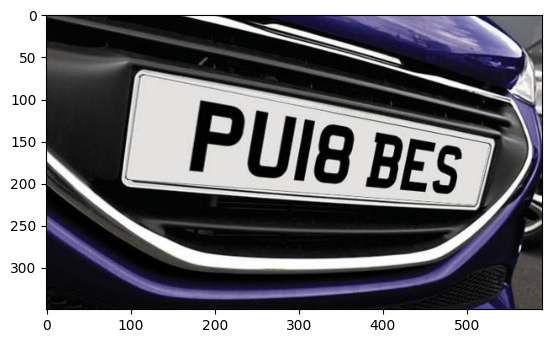

In [7]:
plt.imshow(image)
plt.show()

In [8]:
image_arr_224.shape

(224, 224, 3)

In [9]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [10]:
# making predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 1s 905ms/step


array([[0.14069273, 0.90316325, 0.2689424 , 0.70325416]], dtype=float32)

In [11]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords*denorm
coords

array([[ 83.00870821, 532.86632001,  94.12983507, 246.13895714]])

In [12]:
coords = coords.astype(np.int32)
coords

array([[ 83, 532,  94, 246]], dtype=int32)

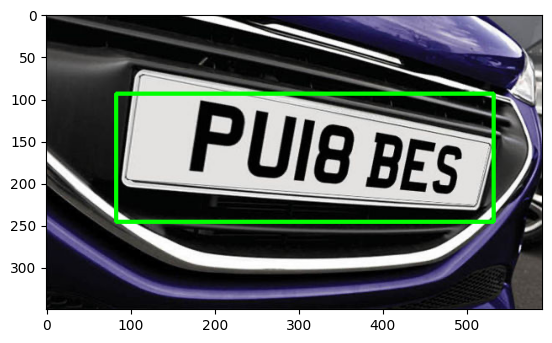

In [13]:
# drawing bounding box on top of the image
xmin, xmax, ymin, ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.imshow(image)
plt.show()

In [32]:
# create pipeline
path = '/content/gdrive/MyDrive/License/test_images/Cars72.png'
def object_detection(path):
    # read image
    image = load_img(path)
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords*denorm
    coords = coords.astype(np.int32)
    # drawing bounding box on top of the image
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin,ymin)
    pt2 = (xmax,ymax)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 [==============================] - 0s 467ms/step


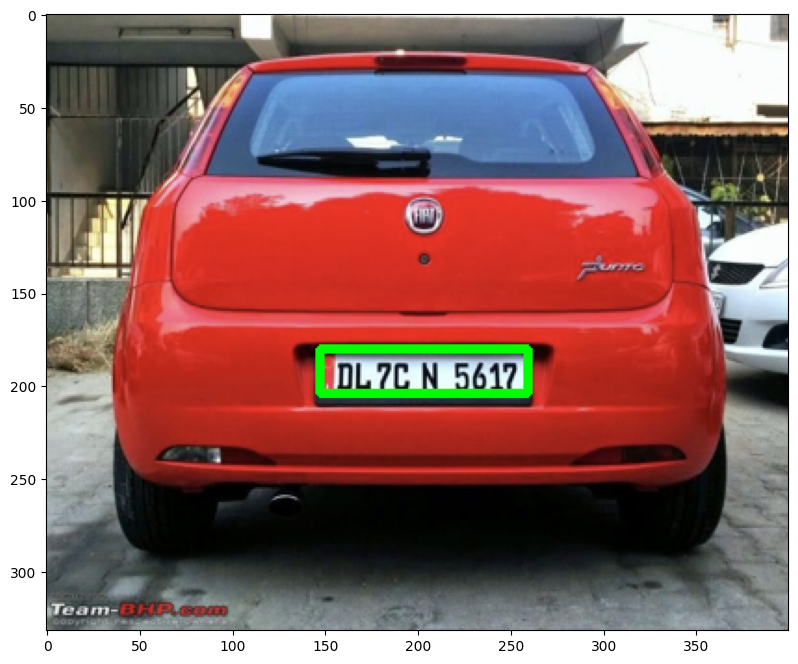

In [56]:
path = '/content/gdrive/MyDrive/License/test_images/Cars72.png'
image, cods = object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [57]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


## Optical Character Recognition - OCR

In [58]:
import pytesseract as pt

1/1 [==============================] - 1s 940ms/step


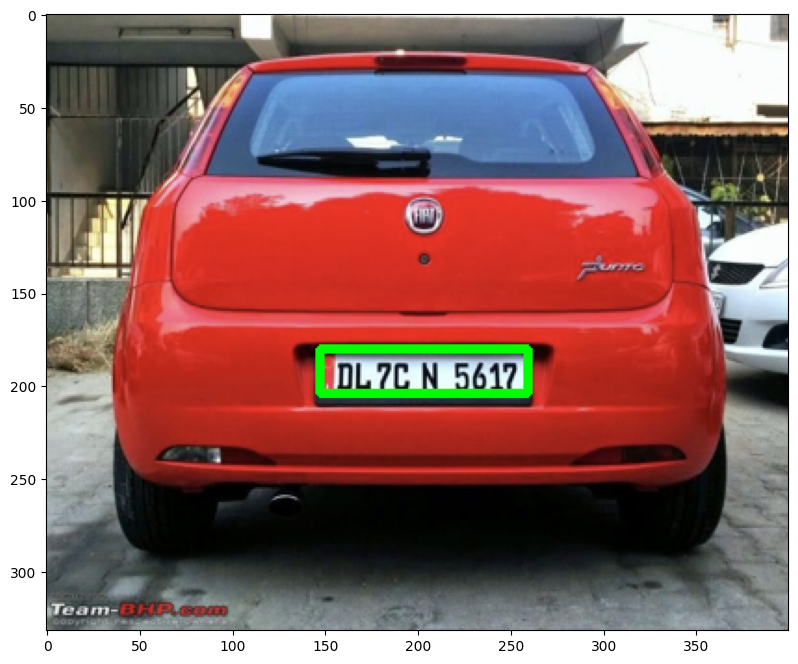

In [63]:
path = '/content/gdrive/MyDrive/License/test_images/Cars72.png'
image, cods = object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [64]:
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]


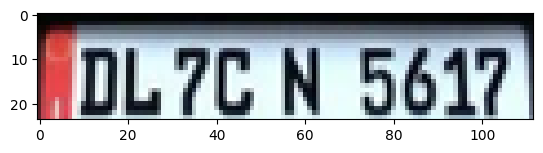

In [65]:
plt.imshow(roi)
plt.show()

In [66]:
# extract text from image
text = pt.image_to_string(roi)
print(text)

DL7C N 5617

